In [217]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

In [218]:
# Set paths
input_folder = '/Users/aiwaziri/PycharmProjects/GitHub/Madinah_dates_hackathon/data_augumentation/ambar_test'
output_folder = 'augumented'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [219]:
def show_image(img_array, title='Augmented Image'):
    """Function to display an image."""
    plt.imshow(img_array.astype('uint8'))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [220]:

# Function for rotation

def augment_rotation(img_array, save_prefix):
    datagen = ImageDataGenerator(rotation_range=40)
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        show_image(batch[0], title='Rotation Augmentation')
        plt.pause(0.001)  # Pause to allow the image to render
        if i >= 4:  # Generate 5 images
            break
    save_img(os.path.join(output_folder, save_prefix + '_rot.jpg'), batch[0])

In [221]:
# Function for zooming
def augment_zoom(img_array, save_prefix):
    datagen = ImageDataGenerator(zoom_range=0.2)
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        show_image(batch[0], title='Zoom Augmentation')
        plt.pause(0.001)
        if i >= 4:
            break
    save_img(os.path.join(output_folder, save_prefix + '_zoom.jpg'), batch[0])




In [222]:
# Function for cropping (using shifts)
def augment_shift(img_array, save_prefix):
    datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        show_image(batch[0], title='Shift Augmentation')
        plt.pause(0.001)
        if i >= 4:
            break
    save_img(os.path.join(output_folder, save_prefix + '_shift.jpg'), batch[0])

In [223]:
# Function for horizontal flip
def augment_horizontal_flip(img_array, save_prefix):
    datagen = ImageDataGenerator(horizontal_flip=True)
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        show_image(batch[0], title='Horizontal Flip Augmentation')
        plt.pause(0.001)
        if i >= 4:
            break
    save_img(os.path.join(output_folder, save_prefix + '_hflip.jpg'), batch[0])

# Function for vertical flip
def augment_vertical_flip(img_array, save_prefix):
    datagen = ImageDataGenerator(vertical_flip=True)
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        show_image(batch[0], title='Vertical Flip Augmentation')
        plt.pause(0.001)
        if i >= 4:
            break
    save_img(os.path.join(output_folder, save_prefix + '_vflip.jpg'), batch[0])


In [224]:
# Function for brightness adjustment
def augment_brightness(img_array, save_prefix):
    datagen = ImageDataGenerator(brightness_range=[0.5, 1.5])
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        show_image(batch[0], title='Brightness Augmentation')
        plt.pause(0.001)
        if i >= 4:
            break
    save_img(os.path.join(output_folder, save_prefix + '_bright.jpg'), batch[0])


In [225]:
# Function for adding noise (Gaussian noise)
def augment_noise(img_array, save_prefix):
    noise_factor = 0.1  # Change this value for more or less noise
    noisy_img = img_array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img_array.shape)
    noisy_img = np.clip(noisy_img, 0., 255.)
    show_image(noisy_img[0], title='Noise Augmentation')
    save_img(os.path.join(output_folder, save_prefix + '_noise.jpg'), noisy_img[0])



In [226]:
# Function for sharpening
def augment_sharpen(img_array, save_prefix):
    from scipy.ndimage import gaussian_filter
    sharpened_img = img_array - gaussian_filter(img_array, sigma=1)
    sharpened_img = np.clip(sharpened_img, 0., 255.)
    show_image(sharpened_img[0], title='Sharpening Augmentation')
    save_img(os.path.join(output_folder, save_prefix + '_sharp.jpg'), sharpened_img[0])


In [227]:
# Function for applying color jitter
def augment_color_jitter(img_array, save_prefix):
    datagen = ImageDataGenerator(
        brightness_range=[0.5, 1.5],
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=40
    )
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        show_image(batch[0], title='Color Jitter Augmentation')
        plt.pause(0.001)
        if i >= 4:
            break
    save_img(os.path.join(output_folder, save_prefix + '_color_jitter.jpg'), batch[0])


In [228]:
# Function for affine transformations
def augment_affine(img_array, save_prefix):
    datagen = ImageDataGenerator(
        shear_range=0.2,
        rotation_range=40,
        zoom_range=0.2
    )
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        show_image(batch[0], title='Affine Augmentation')
        plt.pause(0.001)
        if i >= 4:
            break
    save_img(os.path.join(output_folder, save_prefix + '_affine.jpg'), batch[0])

In [229]:
# Main function to process images
def process_images():
    for image_file in os.listdir(input_folder):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            img_path = os.path.join(input_folder, image_file)
            img = load_img(img_path)  # Load image
            img_array = img_to_array(img)  # Convert to array
            img_array = img_array.reshape((1,) + img_array.shape)  # Reshape

            # Call each augmentation function independently
            augment_rotation(img_array, image_file.split('.')[0])
            augment_horizontal_flip(img_array, image_file.split('.')[0])
            augment_vertical_flip(img_array, image_file.split('.')[0])
            augment_zoom(img_array, image_file.split('.')[0])
            augment_shift(img_array, image_file.split('.')[0])
            augment_brightness(img_array, image_file.split('.')[0])
            augment_noise(img_array, image_file.split('.')[0])
            augment_sharpen(img_array, image_file.split('.')[0])
            augment_color_jitter(img_array, image_file.split('.')[0])
            augment_affine(img_array, image_file.split('.')[0])

    print("All augmentations complete!")

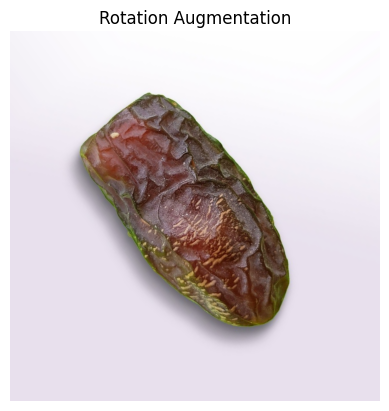

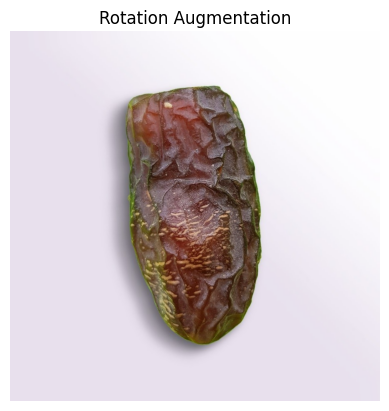

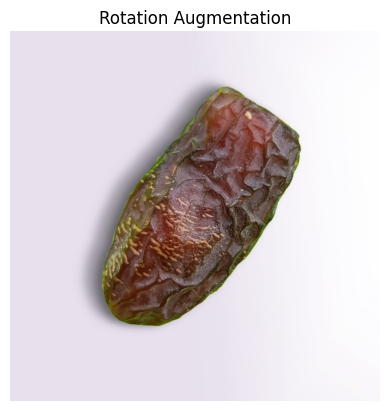

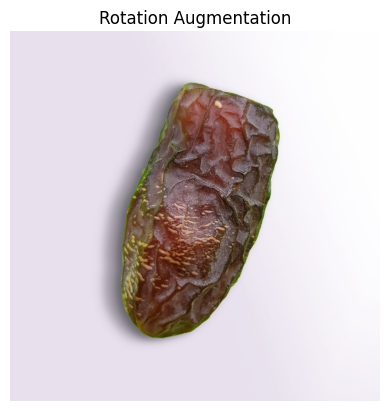

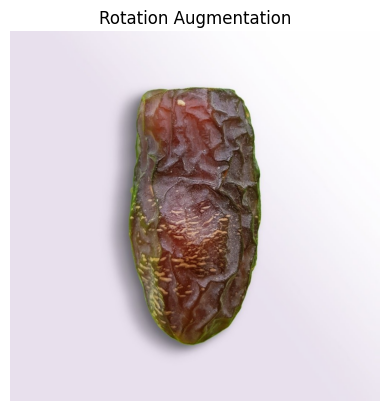

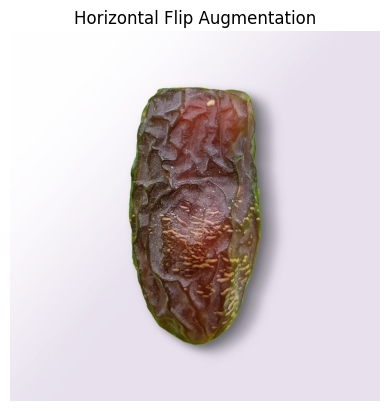

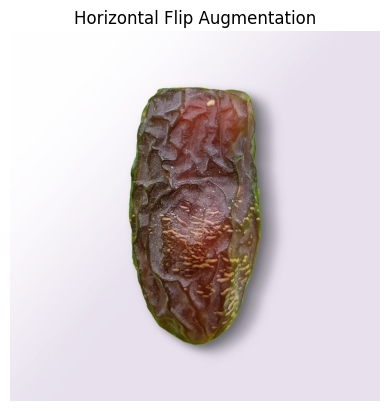

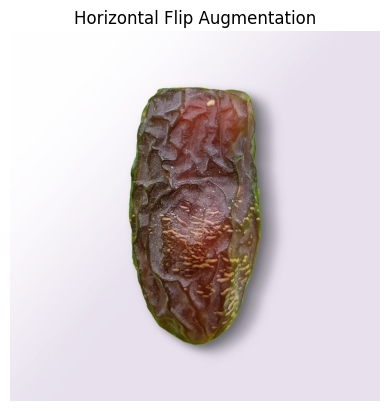

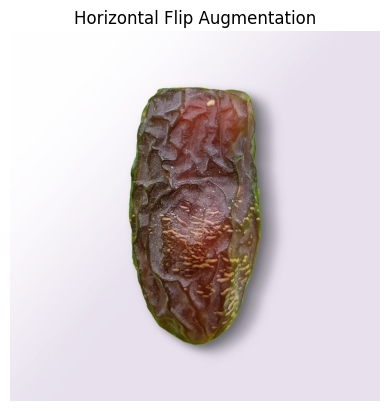

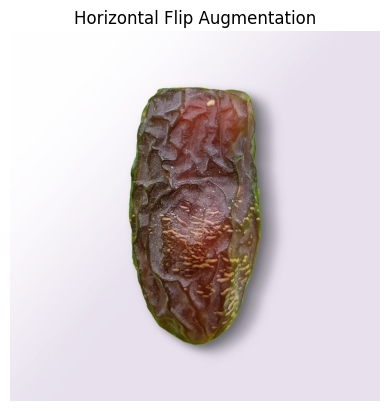

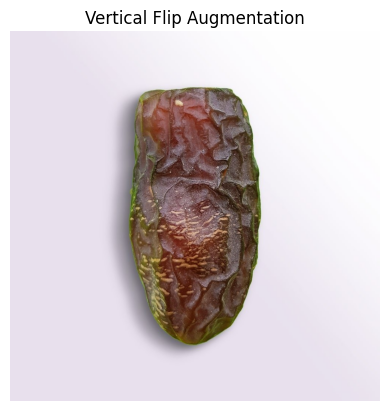

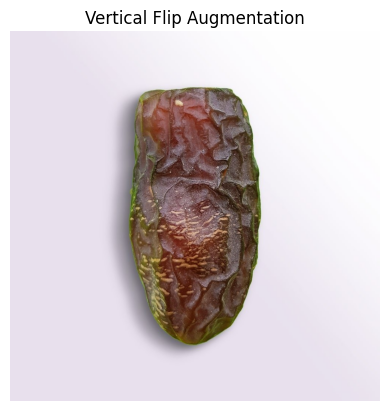

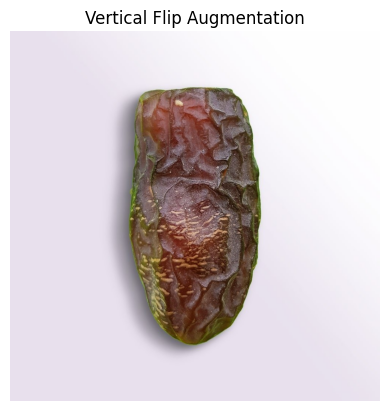

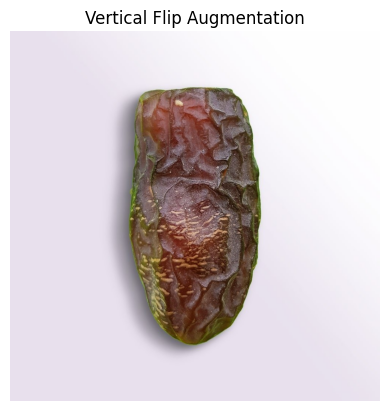

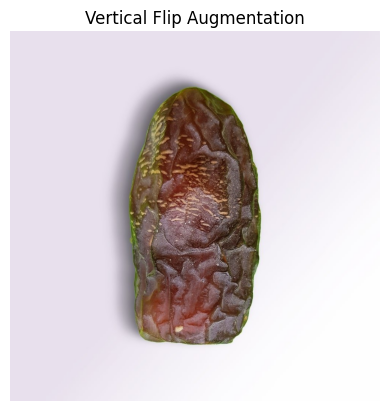

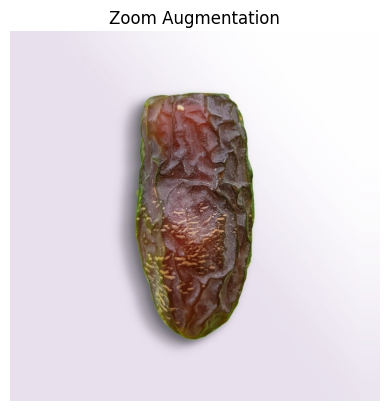

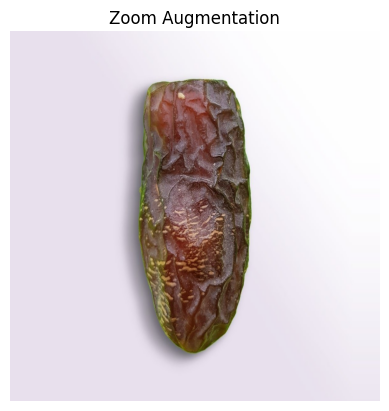

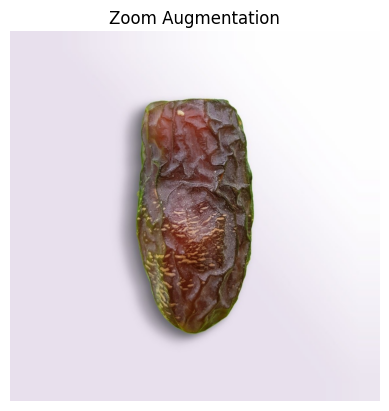

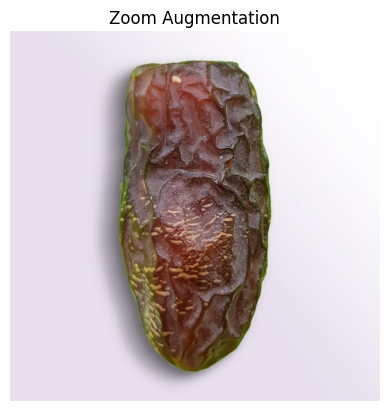

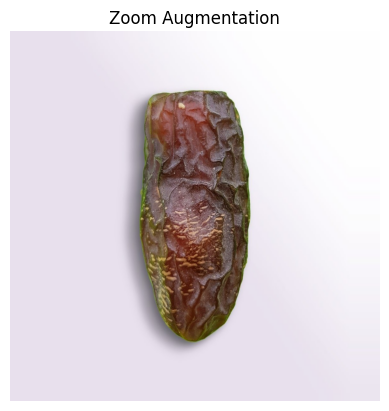

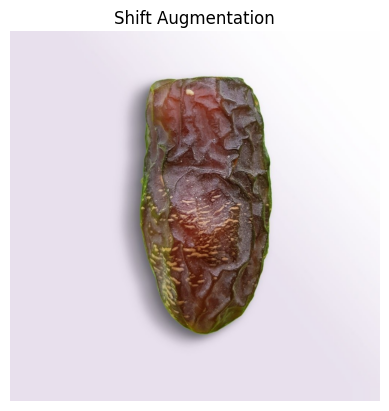

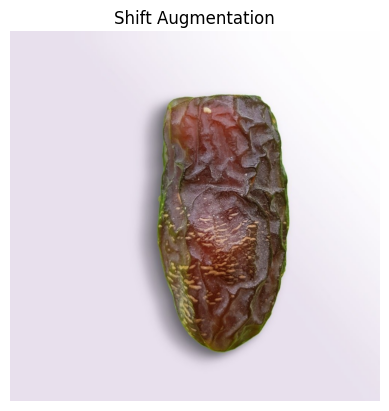

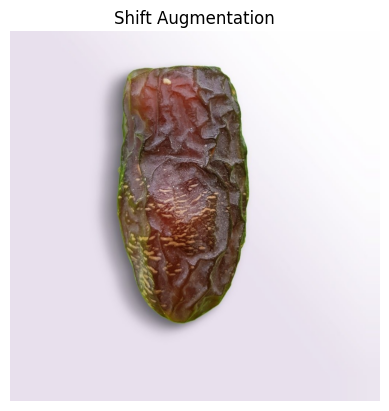

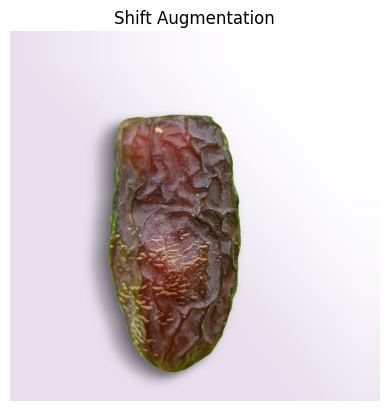

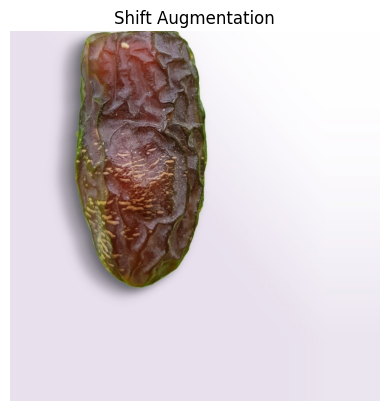

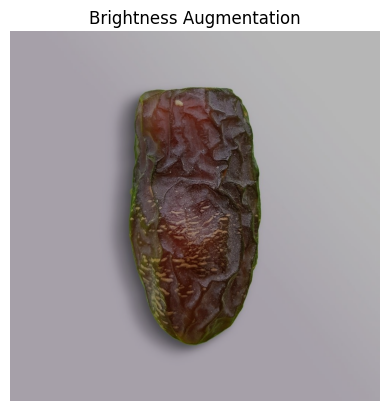

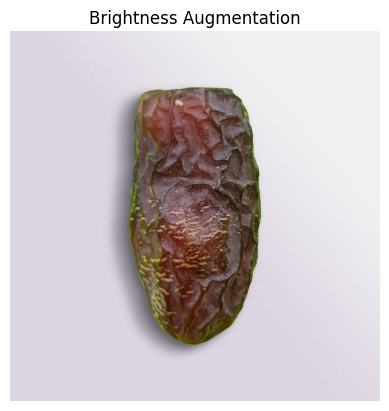

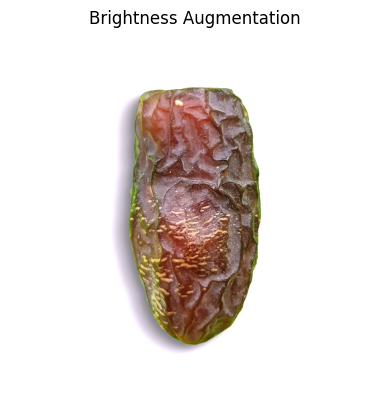

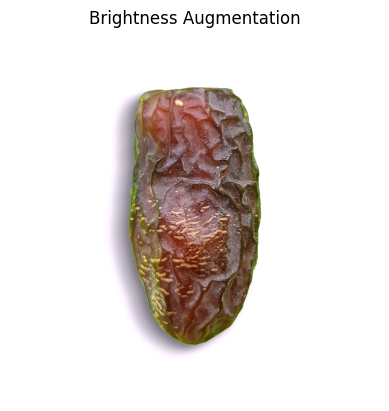

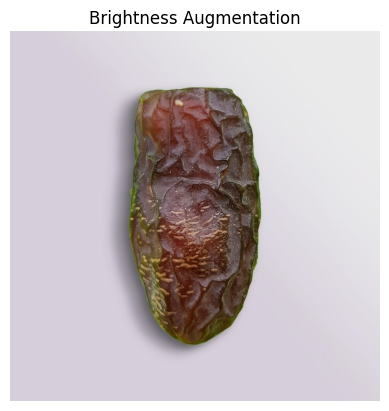

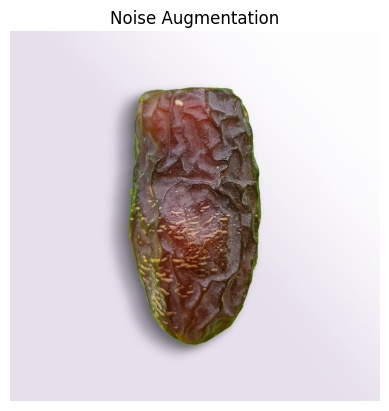

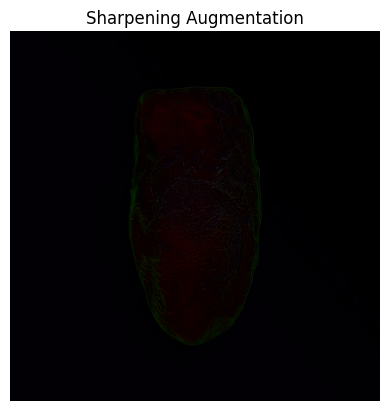

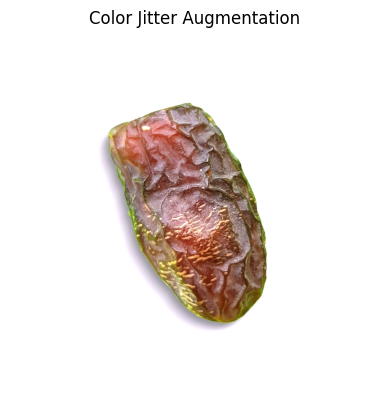

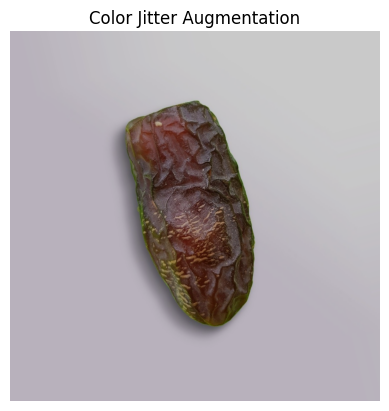

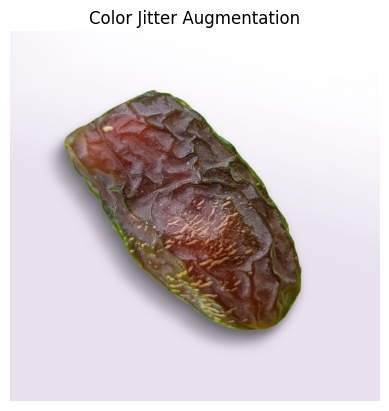

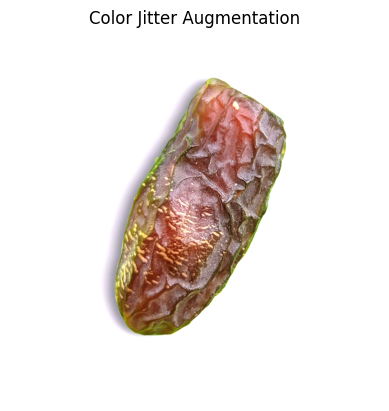

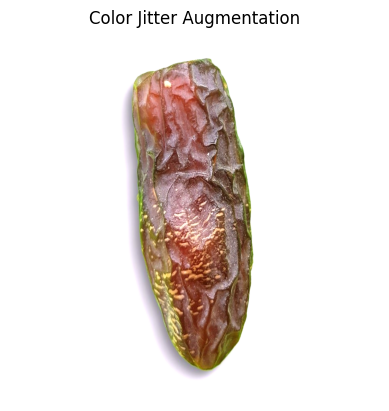

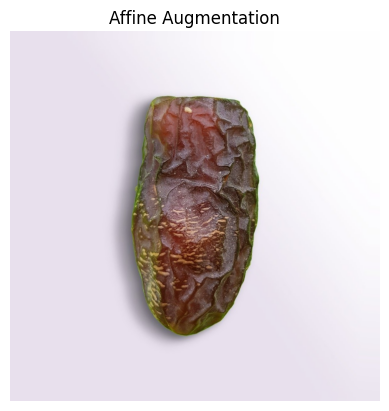

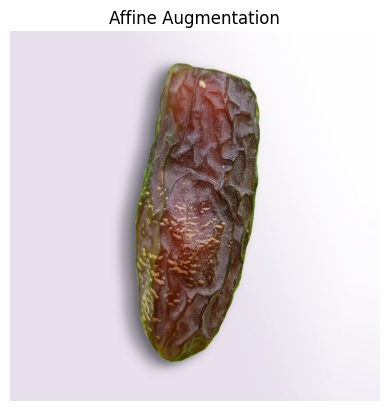

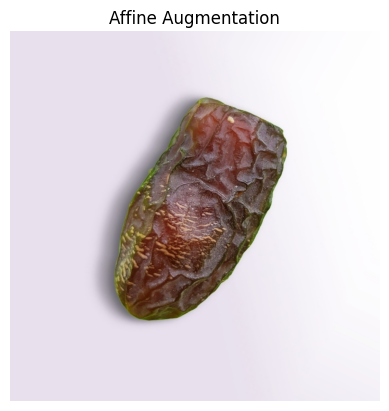

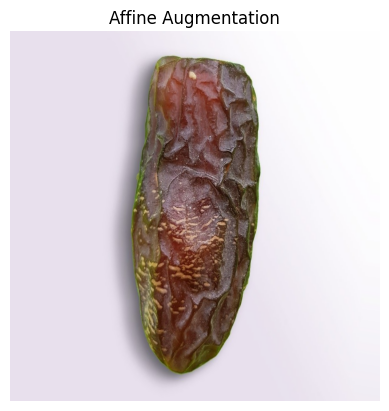

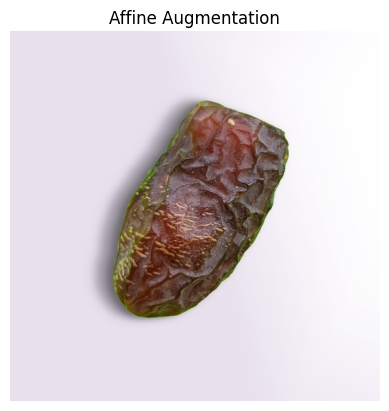

All augmentations complete!


In [230]:
# Run the processing function
process_images()